# <span style="color:#0073e6">0. 사례준비</span>
<style>
@media print
{
h1 {page-break-before:always}
}
</style>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> **Libaray & Environment Settings** 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, v_measure_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans

np.random.seed(1234)

> **CHRUN DATA SET LOADING**

In [3]:
churn = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/churn_case.csv', index_col='customerID')
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,0,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,1,Mailed check,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,0,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,1,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,0,Electronic check,70.70,151.65,1


In [4]:
churn.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

- - -
# <span style="color:#2EFE9A">.</span>

> **변수 설명**
- customerID : 고객ID
- gender : 성별(1:여성, 0:남성)
- SeniorCitizen : 고령자여부(1:Yes, 0:No)
- Partner : 기혼여부(1:Yes, 0: No)
- Dependents : 부양가족여부(1:Yes, 0:No)
- tenure : 가입기간(월단위)
- PhoneService : 집전화이용여부(1:Yes, 0:No)
- MultipleLines : 다중회선여부(1:Yes, 0:No)
- InternetService : 인터넷이용방식
- OnlineSecurity : 인터넷보안서비스사용여부(1:Yes, 0:No)
- OnlineBackup : 인터넷백업서비스사용여부(1:Yes, 0:No)
- DeviceProtection : 기기방화벽서비스사용여부(1:Yes, 0:No)
- TechSupport : 인터넷기술지원서비스사용여부(1:Yes, 0:No)
- StreamingTV : 스트리밍TV여부(1:Yes, 0:No)
- StreamingMovies : 스트리밍영화여부(1:Yes, 0:No)
- Contract : 약정기간(연단위, 0은 약정없음)
- PaperlessBilling : 지로여부(1:Yes, 0:No)
- PaymentMethod : 지불방법
- MonthlyCharges : 한달요금
- TotalCharges : 총지불요금
- Churn : 이탈여부(1:Yes, 0:No)

- - -
# <span style="color:#2EFE9A">.</span>

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null 

- - -
# <span style="color:#2EFE9A">.</span>
> **데이터 준비**
> > 범주형 변수의 처리 (범주개수를 줄여야함)

In [6]:
churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [7]:
cr1 = churn.InternetService=='Fiber optic'
cr2 = churn.InternetService=='DSL'
churn.InternetService = np.where(cr1, 2, np.where(cr2, 1, 0))

In [8]:
churn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

- - -
# <span style="color:#2EFE9A">.</span>

In [9]:
#첫글자만 가지고 원핫인코딩
churn.PaymentMethod = churn.PaymentMethod.str[0]
churn = pd.get_dummies(churn) #원핫인코딩해주는 함수
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  MonthlyCharges    7043 non-null 

In [10]:
churn.to_csv('churn_case_ver01.csv')

- - -
# <span style="color:#2EFE9A">.</span>
> > Train/Test 분할 및 Baseline모델 학습

In [11]:
y = churn.Churn
x = churn.drop('Churn', axis='columns')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [12]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(x_train, y_train)
rf_pred = rf.predict_proba(x_test)
print(roc_auc_score(y_test, rf_pred[:,1]))

0.8369460600547625


In [13]:
print(y_test.mean()) #1의 비율 -> 26.5%가 1임
print((y_test==(rf_pred[:,1]>0.5)).mean()) #0.5를 기준으로 acc
print(y_test[y_test==(rf_pred[:,1]>0.5)].mean()) #잘맞춘 것중에 1의 비율

0.26549929010885
0.7908187411263606
0.1490125673249551


- - -
# <span style="color:#0073e6">1. Clustering 기법의 적용</span>
### 1.1. 군집 수 k의 탐색

In [14]:
results = []
for k in range(2,51):
    kmeans = MiniBatchKMeans(n_clusters=k)
    pred = kmeans.fit_predict(x_train)
    results.append(v_measure_score(y_train, pred))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

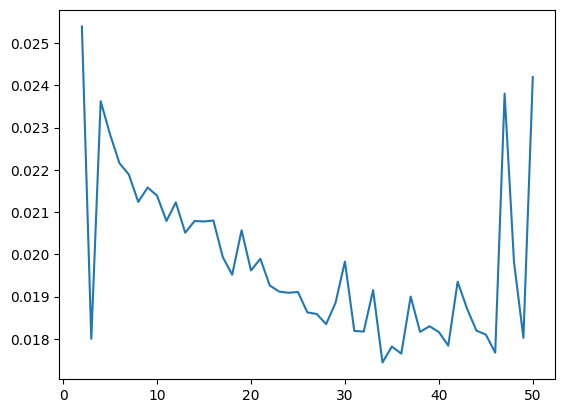

In [15]:
sns.lineplot(x=range(2,51), y=results);

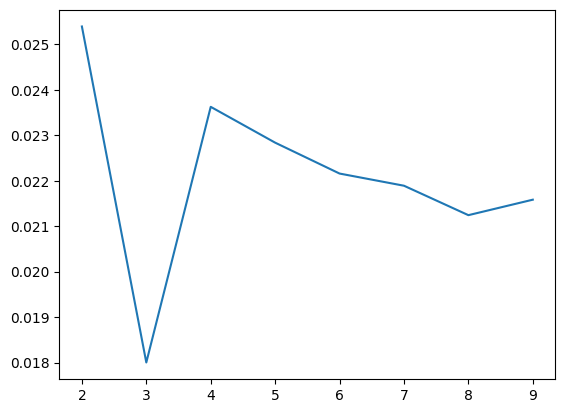

In [16]:
sns.lineplot(x=range(2,10), y=results[:8]);

### 1.2. 클러스터링 적용 및 결과의 확인
> **군집별 특성확인**

In [17]:
kmeans = MiniBatchKMeans(n_clusters=4) ## k-means 4로 지정
clusters = churn.loc[x_train.index]
clusters['group'] = kmeans.fit_predict(x_train)
c_summary = pd.DataFrame(clusters.mean(), columns=['overall'])
c_summary

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,overall
gender,0.493712
SeniorCitizen,0.156998
Partner,0.483773
Dependents,0.296755
tenure,32.269777
PhoneService,0.904665
MultipleLines,0.424544
InternetService,1.220487
OnlineSecurity,0.288844
OnlineBackup,0.341785


In [18]:
c_summary = c_summary.join(clusters.groupby('group').mean().T)
c_summary

#1번 클러스터가 그나마 잘했고, 2번이 구림

,overall,0,1,2,3
gender,0.493712,0.500989,0.488742,0.479659,0.494078
SeniorCitizen,0.156998,0.119905,0.194702,0.191107,0.206430
Partner,0.483773,0.347448,0.656954,0.533586,0.756345
Dependents,0.296755,0.274238,0.347020,0.290445,0.340102
tenure,32.269777,15.090621,54.521854,37.953642,67.131980
PhoneService,0.904665,0.891967,0.935099,0.859981,1.000000
MultipleLines,0.424544,0.227543,0.630464,0.496689,0.874788
InternetService,1.220487,0.925208,1.565563,1.342479,1.824027
OnlineSecurity,0.288844,0.128611,0.498013,0.339640,0.615905
OnlineBackup,0.341785,0.148793,0.607947,0.365184,0.785110


- - -
# <span style="color:#2EFE9A">.</span>

In [19]:
#차이를 보기위해, overall을 각각 다 빼줌
c_diff = c_summary.subtract(c_summary['overall'], axis=0)
c_diff['overall'] = c_summary['overall']
c_diff

,overall,0,1,2,3
gender,0.493712,0.007277,-0.004970,-0.014053,0.000366
SeniorCitizen,0.156998,-0.037093,0.037704,0.034109,0.049432
Partner,0.483773,-0.136325,0.173181,0.049813,0.272572
Dependents,0.296755,-0.022516,0.050265,-0.006310,0.043347
tenure,32.269777,-17.179156,22.252077,5.683866,34.862203
PhoneService,0.904665,-0.012699,0.030434,-0.044684,0.095335
MultipleLines,0.424544,-0.197001,0.205920,0.072145,0.450245
InternetService,1.220487,-0.295279,0.345076,0.121992,0.603540
OnlineSecurity,0.288844,-0.160233,0.209169,0.050797,0.327061
OnlineBackup,0.341785,-0.192992,0.266162,0.023399,0.443325


- - -
# <span style="color:#2EFE9A">.</span>
> **군집 분포 및 Churn확률처리**

In [31]:
clusters.group.value_counts(normalize=True) #전체로 봤을 때 churn 비율

0    0.512576
2    0.214402
1    0.153144
3    0.119878
Name: group, dtype: float64

In [21]:
churn_prob = clusters.groupby('group')[['Churn']].mean().reset_index() #각 군집별 churn 비율
churn_prob

,group,Churn
0,0,0.338346
1,1,0.165563
2,2,0.242195
3,3,0.121827


- - -
# <span style="color:#2EFE9A">.</span>
> **Test set에 대한 군집 추정 및 예측**

In [22]:
pred = pd.DataFrame({'group':kmeans.predict(x_test)})
pred = pred.merge(churn_prob, on='group', how='left')
pred

,group,Churn
0,0,0.338346
1,1,0.165563
2,0,0.338346
3,0,0.338346
4,0,0.338346
...,...,...
2108,0,0.338346
2109,1,0.165563
2110,1,0.165563
2111,3,0.121827


In [23]:
roc_auc_score(y_test, pred['Churn'])

0.6117154335961189

In [24]:
print(y_test.mean())
print((y_test==(pred['Churn']>0.3).values).mean())
print(y_test[y_test==(pred['Churn']>0.3).values].mean()) #잘 맞춘것중에 1의 비율이 올라갔음, 정확도는 떨어졌지만 불균형이 덜 해짐

0.26549929010885
0.5726455276857548
0.30330578512396694


In [25]:
x_train['group'] = kmeans.predict(x_train)
x_test['group'] = kmeans.predict(x_test)

In [26]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(x_train, y_train)
rf_pred = rf.predict_proba(x_test)
roc_auc_score(y_test, rf_pred[:,1])

0.8368886331477297

In [27]:
print(y_test.mean())
print((y_test==(rf_pred[:,1]>0.5)).mean())
print(y_test[y_test==(rf_pred[:,1]>0.5)].mean())

0.26549929010885
0.7908187411263606
0.14661879114302812


In [28]:
x_train = x_train.merge(churn_prob, on='group', how='left')
x_test = x_test.merge(churn_prob, on='group', how='left')

In [29]:
rf = RandomForestClassifier(max_depth=6)
rf.fit(x_train, y_train)
rf_pred = rf.predict_proba(x_test)
roc_auc_score(y_test, rf_pred[:,1])

0.837010378190639

In [30]:
print(y_test.mean())
print((y_test==(rf_pred[:,1]>0.5)).mean())
print(y_test[y_test==(rf_pred[:,1]>0.5)].mean())

0.26549929010885
0.7941315664931378
0.15077473182359952
